In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 20.3 MB/s eta 0:00:0000:01


In [2]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# THIS code block creates YAML File required for training YOLO Models 

# LABELED Directory inside the Main Drectory should have exactly two sub-directories names {images} & {labels}, else model will give error 
# So , we just renamed annnotaion folder to labels
# Same for test directory
DATA_DIR = "/kaggle/input/weed-detection-renamed"
YOLO_DATA_YAML = f"""
path: {DATA_DIR}
train: labeled/images
val: test/images
test: test/images

nc: 2  # Number of classes (0 = Weed, 1 = Crop)
names: ['Weed', 'Crop']
"""
with open("weed_dataset.yaml", "w") as f:
    f.write(YOLO_DATA_YAML)


In [4]:

model = YOLO("yolov8x.pt")  
model.train(data="/kaggle/working/weed_dataset.yaml",
            epochs=50, 
            batch=16, 
            imgsz=512, 
            device="cuda",
            save=True, 
            project="/kaggle/working/yolo_training", 
            name="weed_detection") 


100%|██████████| 131M/131M [00:00<00:00, 395MB/s] 


Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/weed_dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/kaggle/working/yolo_training, name=weed_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/weed-detection-renamed/labeled/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 251.84it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/weed-detection-renamed/labeled is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/weed-detection-renamed/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 215.13it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weed-detection-renamed/test is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolo_training/weed_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolo_training/weed_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.04G      1.746      3.122      1.975         22        512: 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         50         74     0.0563       0.41     0.0464     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.98G      1.702      2.648      1.906         31        512: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         50         74     0.0945      0.512     0.0589     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.93G      1.782       2.51      1.886         29        512: 100%|██████████| 13/13 [00:09<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         50         74     0.0945      0.512     0.0589     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.99G      1.826      2.369       1.88         23        512: 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         50         74     0.0945      0.512     0.0589     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.88G      1.833      2.334      1.889         20        512: 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         50         74     0.0945      0.512     0.0589     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.91G      1.838      2.149      1.928         30        512: 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50         74     0.0945      0.512     0.0589     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.69G      1.739      2.136      1.892         26        512: 100%|██████████| 13/13 [00:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50         74     0.0945      0.512     0.0589     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.91G      1.756      2.104      1.864         29        512: 100%|██████████| 13/13 [00:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py:255: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         50         74    5.7e-05     0.0119   2.97e-05   5.95e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.73G      1.717      1.986      1.837         21        512: 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         50         74      0.506      0.214    0.00481    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.91G      1.685      1.914      1.762         31        512: 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         50         74      0.508      0.238    0.00562    0.00174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       8.9G      1.675      1.888      1.755         40        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         50         74    0.00265      0.238    0.00198   0.000778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.86G       1.67      1.893      1.781         41        512: 100%|██████████| 13/13 [00:12<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         50         74      0.178      0.121      0.091     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.69G      1.577      1.724      1.701         34        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.273      0.262      0.252       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.92G       1.68      1.718      1.781         27        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74    0.00265     0.0119    0.00225   0.000566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.88G      1.619      1.791      1.756         32        512: 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.294      0.294      0.218     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       8.9G      1.607       1.74      1.726         43        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74      0.044      0.268     0.0195    0.00811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.99G      1.496       1.66      1.669         23        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74     0.0413      0.256     0.0177    0.00384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.87G      1.569      1.637      1.677         30        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.572      0.344      0.281      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.91G      1.604      1.702      1.746         21        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.553      0.589      0.589       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.87G      1.538      1.721       1.69         20        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.317      0.475      0.336      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.98G      1.587      1.646      1.683         29        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.659      0.695      0.679      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.88G       1.55      1.639       1.63         28        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         50         74      0.769      0.655      0.738      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       8.9G      1.486      1.554      1.637         29        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50         74      0.805      0.559      0.701        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.91G      1.501      1.495      1.638         23        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.748      0.718      0.763      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       8.7G      1.513      1.529      1.647         32        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.699      0.701      0.751      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.91G      1.488      1.431       1.61         26        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.844        0.8      0.818       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.87G      1.437      1.387      1.605         20        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.601      0.757      0.753      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.83G      1.423      1.419      1.554         19        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.572       0.61      0.635      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       8.7G      1.401      1.332      1.547         29        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.585      0.654      0.722       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.92G      1.379      1.348      1.502         30        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.867      0.665      0.782      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.91G      1.411      1.333      1.545         68        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74       0.73      0.827      0.847      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       8.9G      1.429      1.382      1.553         25        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.827      0.689      0.763      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.96G      1.394      1.278      1.528         28        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.748      0.682      0.743       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.88G      1.358      1.287       1.52         32        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74        0.8      0.736      0.817      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.88G      1.374      1.262      1.593         17        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.924      0.689      0.833      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.84G      1.354      1.275      1.538         37        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.874      0.804      0.859      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       8.7G      1.295      1.228      1.521         23        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.892       0.78      0.863      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.86G      1.306      1.201      1.497         35        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.868      0.791      0.871       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.89G      1.337      1.189      1.513         29        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.856      0.811      0.895      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.84G      1.284      1.172      1.496         29        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.866       0.86      0.887      0.573


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.99G      1.268      1.249      1.562         29        512: 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.901      0.823      0.875      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.91G       1.18      1.061      1.497         10        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.887       0.78      0.866      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.85G      1.117     0.9957      1.439         11        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.905       0.78      0.828      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.85G      1.122      1.034      1.471          8        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.793      0.843      0.861      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.94G       1.13      1.013       1.43         14        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.789      0.805      0.855      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.93G      1.094      1.023      1.447         11        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.948      0.733      0.881      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.88G      1.072     0.9583      1.419         24        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74       0.83      0.815      0.884       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.87G      1.043     0.9002      1.385         10        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.831      0.862      0.893      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.98G      1.088     0.8924      1.437         18        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74       0.83      0.849      0.893      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.91G      1.044      0.921      1.409         16        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.847      0.862        0.9      0.568



50 epochs completed in 0.211 hours.
Optimizer stripped from /kaggle/working/yolo_training/weed_detection/weights/last.pt, 136.7MB
Optimizer stripped from /kaggle/working/yolo_training/weed_detection/weights/best.pt, 136.7MB

Validating /kaggle/working/yolo_training/weed_detection/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


                   all         50         74      0.831       0.85      0.893       0.58
                  Weed         24         42      0.882      0.888      0.932      0.628
                  Crop         26         32       0.78      0.812      0.854      0.533


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 23.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/yolo_training/weed_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb2489cf0a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [5]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/yolo_training/weed_detection/weights/best.pt")

model.train(data="/kaggle/working/weed_dataset.yaml",
            epochs=20,  # Additional epochs
            batch=16, 
            imgsz=512, 
            device="cuda",
            save=True,
            project="/kaggle/working/yolo_training", 
            name="weed_detection") 


Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolo_training/weed_detection/weights/best.pt, data=/kaggle/working/weed_dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/kaggle/working/yolo_training, name=weed_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning /kaggle/input/weed-detection-renamed/labeled/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 534.16it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/weed-detection-renamed/labeled is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/weed-detection-renamed/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 323.87it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weed-detection-renamed/test is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolo_training/weed_detection2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolo_training/weed_detection2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.4G       1.35      1.313      1.524         22        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.945      0.716      0.881      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       8.7G       1.32      1.269      1.511         31        512: 100%|██████████| 13/13 [00:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         50         74      0.822      0.745      0.862      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.94G      1.362      1.287      1.536         29        512: 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         50         74      0.633      0.652      0.603      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.79G      1.354      1.246       1.49         23        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.575      0.662      0.664      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.98G      1.382      1.284      1.527         20        512: 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74      0.363      0.725      0.364      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.97G      1.381      1.288      1.535         30        512: 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74      0.463       0.52       0.41      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.01G      1.333      1.286      1.531         26        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74       0.83      0.708       0.78      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.96G      1.413      1.363      1.562         29        512: 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50         74      0.797      0.655      0.702      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.01G      1.344      1.211      1.585         21        512: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50         74      0.824      0.726      0.751      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.97G      1.342      1.218       1.49         31        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.893      0.655      0.818      0.407


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.94G      1.261      1.246      1.539          8        512: 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.777      0.769      0.765      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.91G      1.275      1.216      1.629         25        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.798      0.712      0.765      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.99G      1.184      1.112       1.48         10        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.877      0.792      0.869      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.96G      1.168      1.096       1.53         14        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.839      0.809      0.857      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       8.9G      1.127       1.01       1.44          9        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.814      0.807      0.861      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.93G      1.138     0.9807      1.426          8        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.913      0.804      0.859      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.75G      1.119     0.9202      1.388          8        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.804      0.766      0.802      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.93G      1.044     0.9059      1.405          8        512: 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.879      0.818      0.864      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.91G        1.1     0.9367       1.42         30        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         74      0.846      0.839      0.882      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.94G      1.089     0.8675      1.419          9        512: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.831      0.847      0.891      0.581



20 epochs completed in 0.087 hours.
Optimizer stripped from /kaggle/working/yolo_training/weed_detection2/weights/last.pt, 136.7MB
Optimizer stripped from /kaggle/working/yolo_training/weed_detection2/weights/best.pt, 136.7MB

Validating /kaggle/working/yolo_training/weed_detection2/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         50         74      0.831      0.847      0.891       0.58
                  Weed         24         42      0.891      0.881      0.944      0.639
                  Crop         26         32      0.771      0.812      0.837      0.522


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 22.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/yolo_training/weed_detection2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb249385150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import os
from ultralytics import YOLO

model = YOLO("/kaggle/working/yolo_training/weed_detection/weights/best.pt")

UNLABELED_IMAGES_DIR = "/kaggle/input/weed-detection-renamed/unlabeled"
PSEUDO_LABELS_DIR = "/kaggle/working/pseudo_labels"


os.makedirs(PSEUDO_LABELS_DIR, exist_ok=True)

results = model.predict(source=UNLABELED_IMAGES_DIR, conf=0.5, save=False)  

def convert_predictions_to_yolo(results, save_dir, image_width, image_height):
    """
    Converts YOLO predictions into YOLO annotation format and saves them as .txt files.
    
    Args:
        results: YOLO inference results containing boxes, scores, and labels.
        save_dir: Directory to save the pseudo-labels.
        image_width: Width of the image (used for normalization).
        image_height: Height of the image (used for normalization).
    """
    for r in results:
        image_name = os.path.basename(r.path).replace(".jpg", ".txt")
        label_path = os.path.join(save_dir, image_name)

        with open(label_path, "w") as f:
            for box, score, cls in zip(r.boxes.xywh.cpu().numpy(), r.boxes.conf.cpu().numpy(), r.boxes.cls.cpu().numpy()):
                if score > 0.5: 
                    x_center, y_center, width, height = box
                    class_id = int(cls)

                    # Normalize the coordinates to be between 0 and 1
                    x_center_normalized = x_center / image_width
                    y_center_normalized = y_center / image_height
                    width_normalized = width / image_width
                    height_normalized = height / image_height
                    f.write(f"{class_id} {x_center_normalized:.6f} {y_center_normalized:.6f} {width_normalized:.6f} {height_normalized:.6f}\n")

# Assuming you know the dimensions of the image
# You can extract the image size dynamically if needed, but let's assume a default image size here:
image_width = 512  # Example image width (in pixels)
image_height = 512  # Example image height (in pixels)

# Convert and save pseudo-labels (normalize bounding box coordinates)
convert_predictions_to_yolo(results, PSEUDO_LABELS_DIR, image_width, image_height)
print(f"Pseudo-labels saved in {PSEUDO_LABELS_DIR}")


In [7]:
import os
import shutil

LABELED_IMAGES_SRC = "/kaggle/input/weed-detection-renamed/labeled/images"
LABELED_LABELS_SRC = "/kaggle/input/weed-detection-renamed/labeled/labels"
PSEUDO_IMAGES_SRC = "/kaggle/input/weed-detection-renamed/unlabeled"
PSEUDO_LABELS_SRC = "/kaggle/working/pseudo_labels"

TRAIN_IMAGES_DIR = "/kaggle/working/train_images"
IMAGES_DIR = os.path.join(TRAIN_IMAGES_DIR, "images")
LABELS_DIR = os.path.join(TRAIN_IMAGES_DIR, "labels")


os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(LABELS_DIR, exist_ok=True)


for image_name in os.listdir(LABELED_IMAGES_SRC):
    shutil.copy(os.path.join(LABELED_IMAGES_SRC, image_name), os.path.join(IMAGES_DIR, image_name))
    label_name = image_name.replace(".jpg", ".txt")
    shutil.copy(os.path.join(LABELED_LABELS_SRC, label_name), os.path.join(LABELS_DIR, label_name))

for image_name in os.listdir(PSEUDO_IMAGES_SRC):
    shutil.copy(os.path.join(PSEUDO_IMAGES_SRC, image_name), os.path.join(IMAGES_DIR, image_name))
    label_name = image_name.replace(".jpg", ".txt")
    shutil.copy(os.path.join(PSEUDO_LABELS_SRC, label_name), os.path.join(LABELS_DIR, label_name))

print("Labeled and pseudo-labeled images and labels copied to train_images directory.")


Labeled and pseudo-labeled images and labels copied to train_images directory.


In [9]:
# Updating the dataset YAML to include labeled and pseudo-labeled images
YOLO_DATA_YAML = f"""
path: /kaggle/working
train: /kaggle/working/train_images/images  # Directory with both labeled and pseudo-labeled images
val: /kaggle/input/weed-detection-renamed/test/images
test: /kaggle/input/weed-detection-renamed/test/images

nc: 2  # Number of classes (0 = Weed, 1 = Crop)
names: ['Weed', 'Crop']
"""

# Save the updated dataset YAML
yaml_path = "/kaggle/working/weed_dataset_updated.yaml"
with open(yaml_path, "w") as f:
    f.write(YOLO_DATA_YAML)

print(f"Dataset YAML saved to {yaml_path}")


Dataset YAML saved to /kaggle/working/weed_dataset_updated.yaml


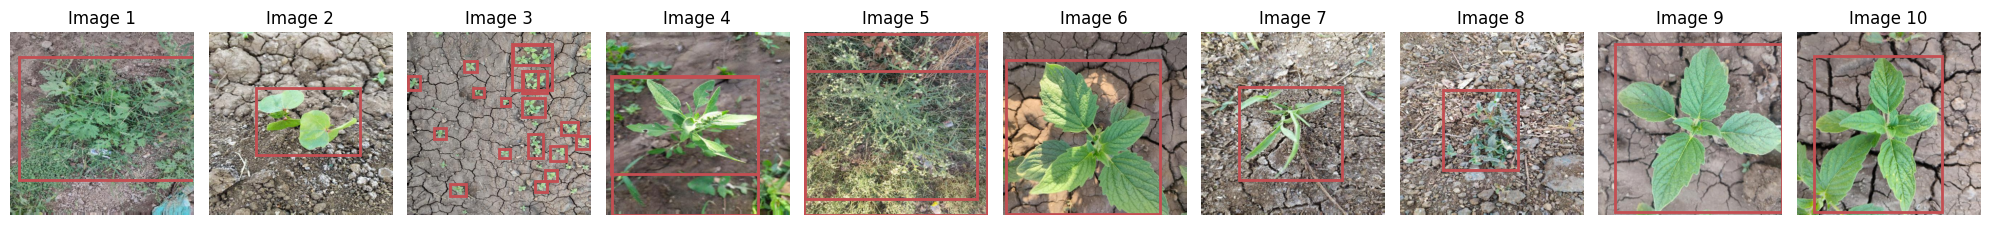

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

UNLABELED_IMAGES_DIR = "/kaggle/input/weed-detection-renamed/unlabeled"
PSEUDO_LABELS_DIR = "/kaggle/working/pseudo_labels"


image_files = os.listdir(UNLABELED_IMAGES_DIR)

num_images_to_show = 10
fig, axes = plt.subplots(1, num_images_to_show, figsize=(20, 5))

for i in range(num_images_to_show):
    image_path = os.path.join(UNLABELED_IMAGES_DIR, image_files[i])
    
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
    
    # Load the corresponding pseudo-label file
    label_file = image_files[i].replace(".jpg", ".txt")  # Assuming `.jpg` images and `.txt` labels
    label_path = os.path.join(PSEUDO_LABELS_DIR, label_file)
    
    # Read the YOLO format labels (class_id, x_center, y_center, width, height)
    with open(label_path, 'r') as f:
        annotations = f.readlines()
    
    # Plot the image
    ax = axes[i]
    ax.imshow(image_rgb)
    ax.set_title(f"Image {i+1}")
    
    # Add bounding boxes for each annotation
    for annotation in annotations:
        class_id, x_center, y_center, width, height = map(float, annotation.split())
        
        # Convert from YOLO format (normalized) to pixel values
        x_center_pixel = x_center * image.shape[1]
        y_center_pixel = y_center * image.shape[0]
        width_pixel = width * image.shape[1]
        height_pixel = height * image.shape[0]
        
        # Calculate top-left and bottom-right corners of the bounding box
        x_min = x_center_pixel - width_pixel / 2
        y_min = y_center_pixel - height_pixel / 2
        x_max = x_center_pixel + width_pixel / 2
        y_max = y_center_pixel + height_pixel / 2
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
    
    ax.axis("off")
plt.tight_layout()
plt.show()


In [11]:
model = YOLO("/kaggle/working/yolo_training/weed_detection2/weights/best.pt")
model.train(data="/kaggle/working/weed_dataset_updated.yaml",  
            epochs=30,  
            batch=16, 
            imgsz=512, 
            device="cuda", 
            save=True,  
            project="/kaggle/working/yolo_training", 
            name="weed_detection") 


Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolo_training/weed_detection2/weights/best.pt, data=/kaggle/working/weed_dataset_updated.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/kaggle/working/yolo_training, name=weed_detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning /kaggle/working/train_images/labels... 1200 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<00:00, 1238.05it/s]

train: New cache created: /kaggle/working/train_images/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/weed-detection-renamed/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 439.66it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weed-detection-renamed/test is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolo_training/weed_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolo_training/weed_detection3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.5G      1.076      1.048      1.385         79        512: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         50         74      0.809      0.805      0.837      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.04G      1.107      1.072      1.396         61        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.826      0.796      0.834      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.02G      1.128      1.121      1.427         48        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.752       0.78      0.817       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.97G      1.153      1.127      1.443         56        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.781      0.778      0.812      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.03G       1.09      1.066      1.398         46        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.867      0.764      0.833      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.04G       1.08      1.016      1.395         67        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.857       0.79      0.885      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.98G      1.065     0.9902      1.378         41        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.845      0.819      0.873      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.98G      1.015      0.925      1.325         54        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.855      0.864      0.873      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.93G      1.017     0.9368      1.342         54        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74      0.859      0.832      0.863      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.76G     0.9919     0.8835      1.317         88        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.933      0.836      0.896       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.01G     0.9678     0.8617      1.319         44        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.842      0.874      0.898       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.93G       0.98     0.8798      1.311         75        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.918      0.728      0.849      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         9G     0.9421     0.8462      1.291         36        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.801      0.776      0.849      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.05G     0.9561     0.8522      1.297         45        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74        0.9       0.83      0.872      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.96G     0.9071     0.7951       1.27         56        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.831      0.886      0.885      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.93G     0.8717      0.782       1.25         50        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.906        0.8      0.876      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.97G     0.8825     0.7905      1.267         46        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74      0.909      0.823      0.885      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.03G     0.8815     0.7784      1.252         45        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74       0.86      0.886      0.893      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         9G     0.8638     0.7438      1.249         55        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.855      0.816      0.865      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.98G     0.8739     0.7472      1.259         47        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.908      0.852      0.892       0.55


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.93G     0.6905     0.6093      1.154         41        512: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.871      0.832       0.89      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.78G     0.6766     0.5692      1.149         33        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50         74      0.875      0.902      0.908      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.94G     0.6537     0.5333      1.123         17        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.876      0.829        0.9      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.02G     0.6455     0.5274      1.131         33        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.896      0.832      0.895      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.01G     0.6256     0.5154      1.111         49        512: 100%|██████████| 75/75 [01:09<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         74      0.943      0.844      0.905      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.04G     0.6094      0.501      1.105         21        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.876      0.851      0.901       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.94G     0.5879     0.4919      1.104         18        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.911      0.819      0.879      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.98G     0.5775     0.4788      1.086         23        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74      0.911      0.855      0.902      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.06G     0.5664      0.471      1.078         28        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50         74       0.92      0.831      0.912      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       8.8G     0.5488     0.4464      1.074         17        512: 100%|██████████| 75/75 [01:10<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         74      0.921      0.848       0.91      0.568



30 epochs completed in 0.619 hours.
Optimizer stripped from /kaggle/working/yolo_training/weed_detection3/weights/last.pt, 136.7MB
Optimizer stripped from /kaggle/working/yolo_training/weed_detection3/weights/best.pt, 136.7MB

Validating /kaggle/working/yolo_training/weed_detection3/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


                   all         50         74       0.92      0.831      0.912      0.574
                  Weed         24         42      0.942      0.881      0.952       0.63
                  Crop         26         32      0.899      0.781      0.873      0.519


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 22.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/yolo_training/weed_detection3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb21fe767a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

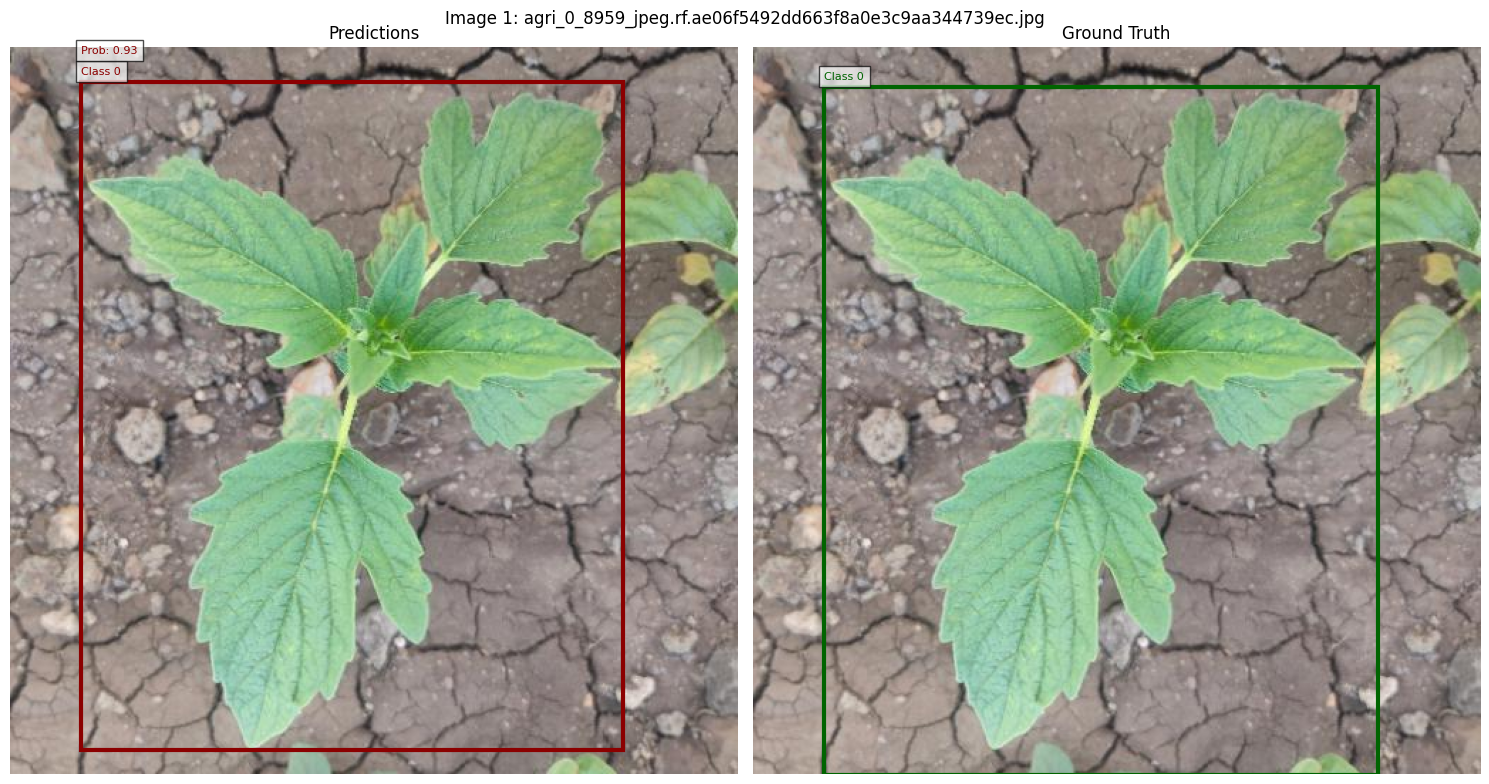

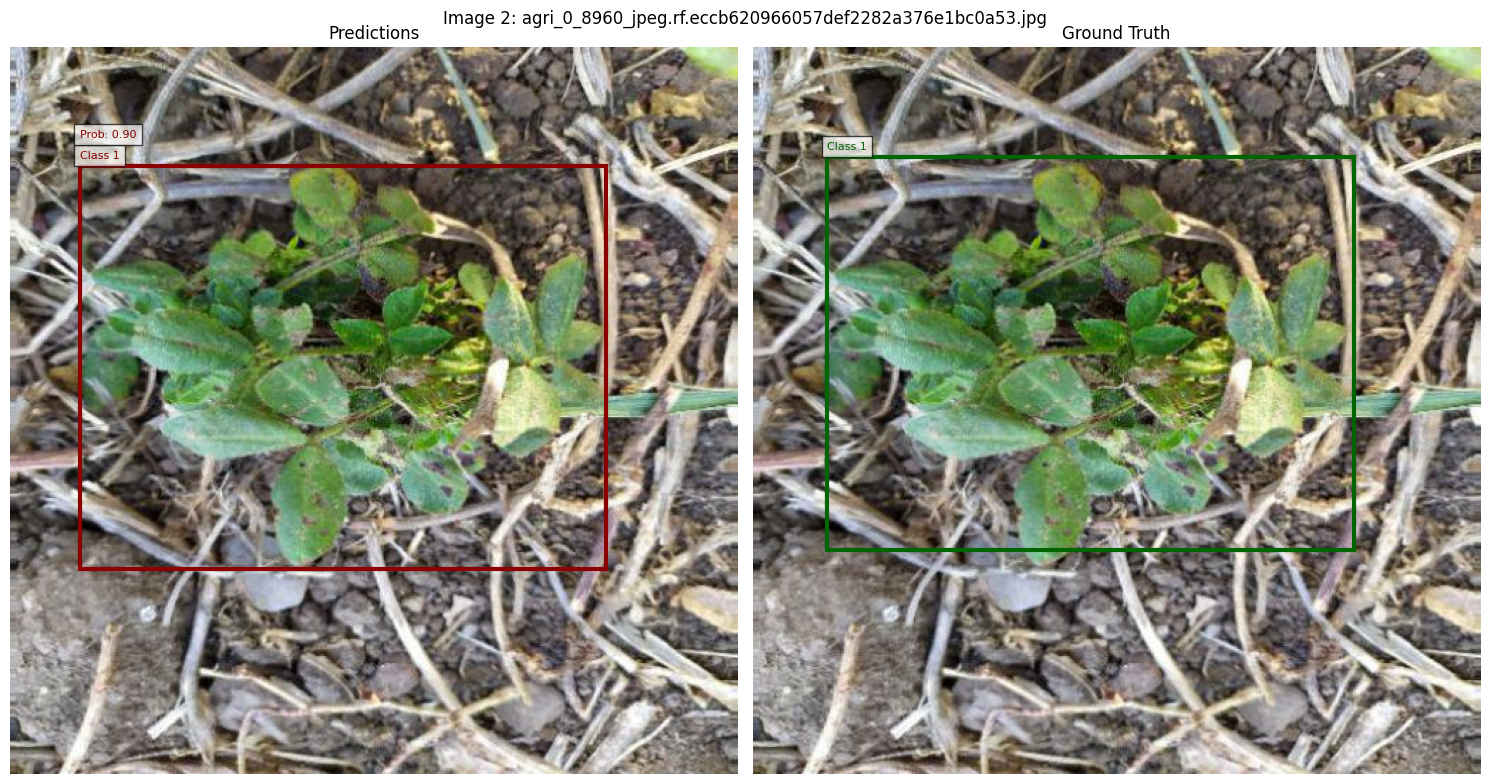

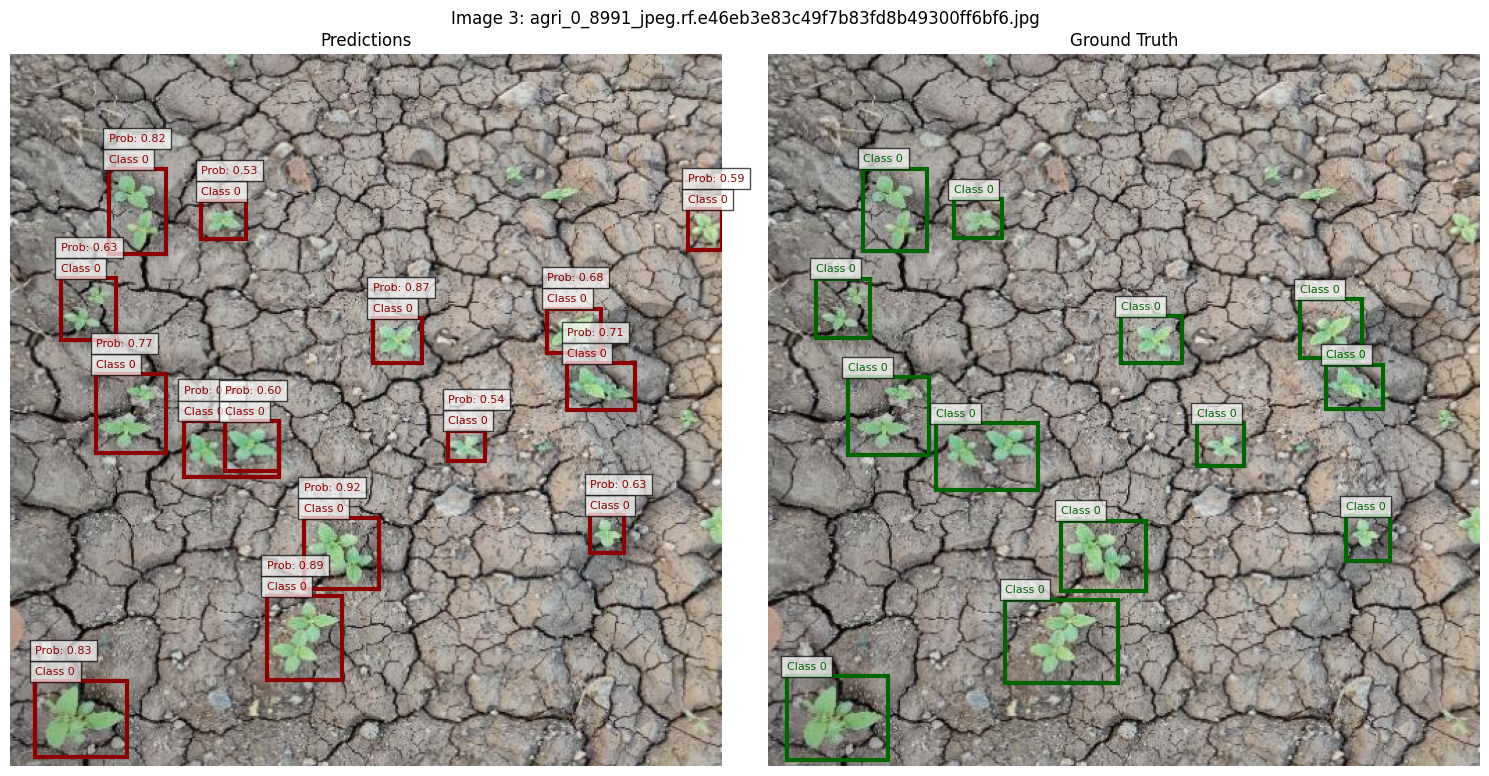

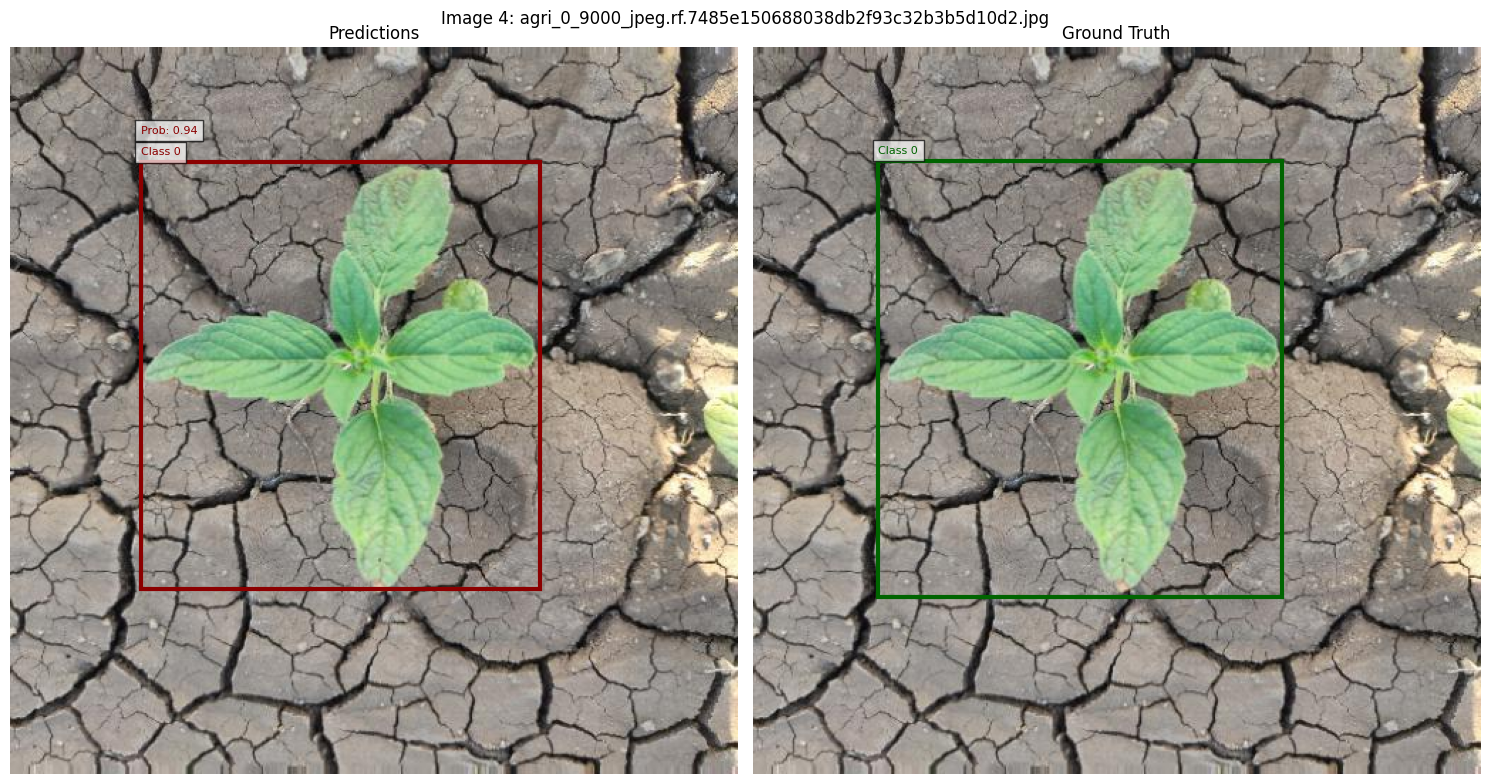

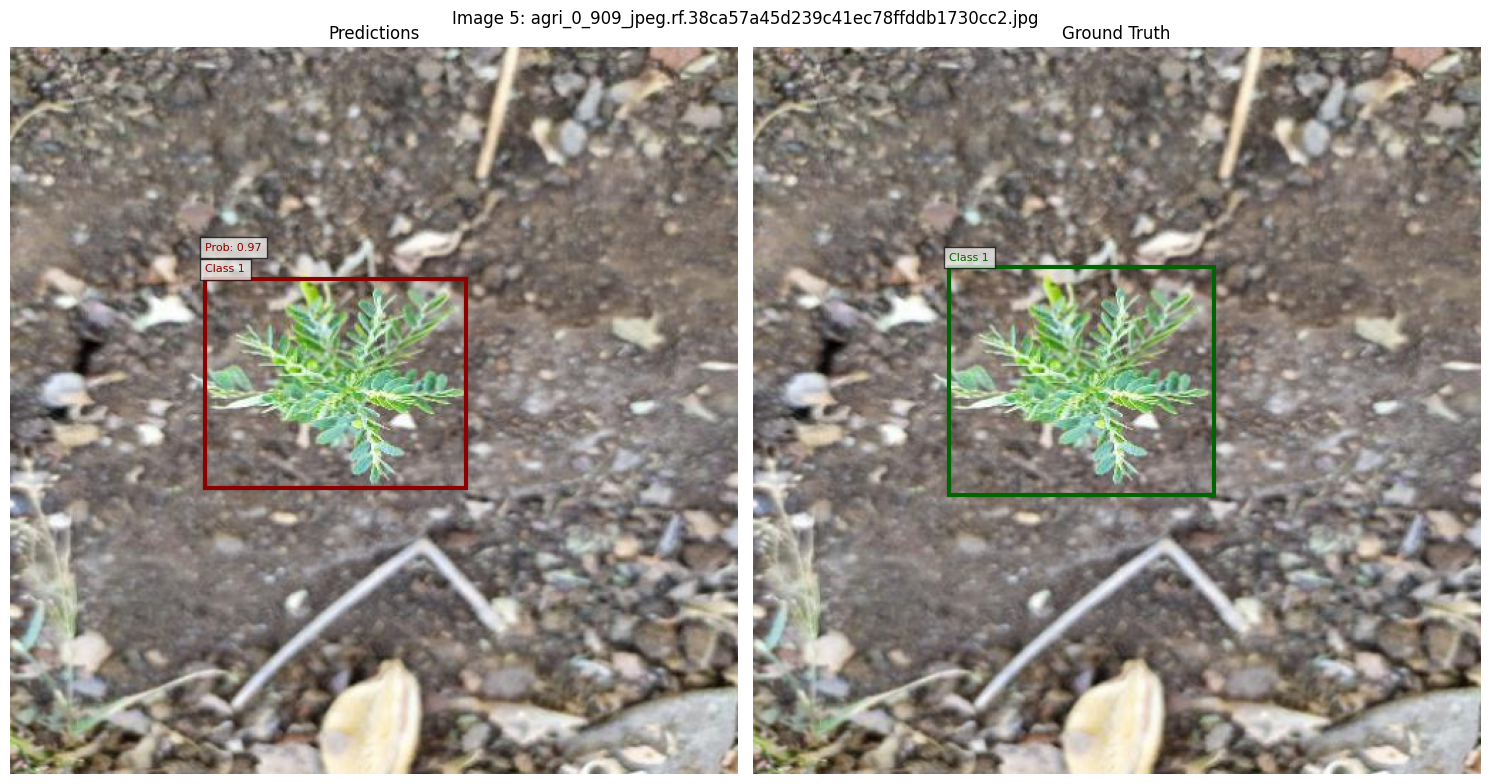

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO

def visualize_detections(model, test_images_dir, actual_labels_dir, num_images=5, conf_threshold=0.5):
    image_files = sorted([f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
    num_images = min(num_images, len(image_files))
    for i in range(num_images):
        image_path = os.path.join(test_images_dir, image_files[i])
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width = image.shape[:2]
        label_file = os.path.splitext(image_files[i])[0] + '.txt'
        label_path = os.path.join(actual_labels_dir, label_file)
        try:
            actual_labels = []
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    actual_labels = f.readlines()
        except Exception as e:
            print(f"Error reading label file {label_path}: {e}")
            actual_labels = []
        
        try:
            results = model(image_path, conf=conf_threshold, verbose=False)[0]
        except Exception as e:
            print(f"Error during prediction for {image_path}: {e}")
            continue
            
        fig, (ax_pred, ax_actual) = plt.subplots(1, 2, figsize=(15, 8))
        fig.suptitle(f'Image {i+1}: {image_files[i]}', fontsize=12)
        
        # Plot predictions
        ax_pred.imshow(image_rgb)
        ax_pred.set_title("Predictions")
        
        if results.boxes is not None:
            boxes = results.boxes.xywh.cpu().numpy()
            scores = results.boxes.conf.cpu().numpy()
            classes = results.boxes.cls.cpu().numpy()
            
            for box, score, cls_id in zip(boxes, scores, classes):
                x_center, y_center, w, h = box
                x_min = x_center - w/2
                y_min = y_center - h/2
                
                # Darker boundary, no fill
                rect = patches.Rectangle(
                    (x_min, y_min), w, h,
                    linewidth=3,  # Increased line width
                    edgecolor='darkred',  # Darker red
                    facecolor='none'  # No fill
                )
                ax_pred.add_patch(rect)
                
                # Class label
                ax_pred.text(
                    x_min, y_min-5,
                    f'Class {int(cls_id)}',
                    color='darkred',
                    fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7)
                )
                
                # Probability score (separate)
                ax_pred.text(
                    x_min, y_min-20,
                    f'Prob: {score:.2f}',
                    color='darkred',
                    fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7)
                )
        ax_actual.imshow(image_rgb)
        ax_actual.set_title("Ground Truth")
        
        for label in actual_labels:
            try:
                cls_id, x_center, y_center, w, h = map(float, label.strip().split())  
                x_center *= width
                y_center *= height
                w *= width
                h *= height
                x_min = x_center - w/2
                y_min = y_center - h/2
                rect = patches.Rectangle(
                    (x_min, y_min), w, h,
                    linewidth=3,  
                    edgecolor='darkgreen',  
                    facecolor='none'
                )
                ax_actual.add_patch(rect)
                ax_actual.text(
                    x_min, y_min-5,
                    f'Class {int(cls_id)}',
                    color='darkgreen',
                    fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7)
                )
            except Exception as e:
                print(f"Error processing label {label}: {e}")
                continue
        
        ax_pred.axis('off')
        ax_actual.axis('off')
        
        plt.tight_layout()
        plt.show()
        plt.close()
TEST_IMAGES_DIR = "/kaggle/input/weed-detection-renamed/test/images"
ACTUAL_LABELS_DIR = "/kaggle/input/weed-detection-renamed/test/labels"
visualize_detections(model, TEST_IMAGES_DIR, ACTUAL_LABELS_DIR, num_images=5, conf_threshold=0.5)

Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/weed-detection-renamed/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 664.80it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weed-detection-renamed/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


                   all         50         74       0.92      0.831      0.912      0.573
                  Weed         24         42      0.942      0.881      0.952      0.633
                  Crop         26         32      0.899      0.781      0.873      0.514


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 54.5ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val7

                DETECTION METRICS                 
mAP@0.5-0.95: 0.573
mAP@0.5: 0.912
Precision: 0.920
Recall: 0.831
F1-Score: 0.873
Fitness: 0.607


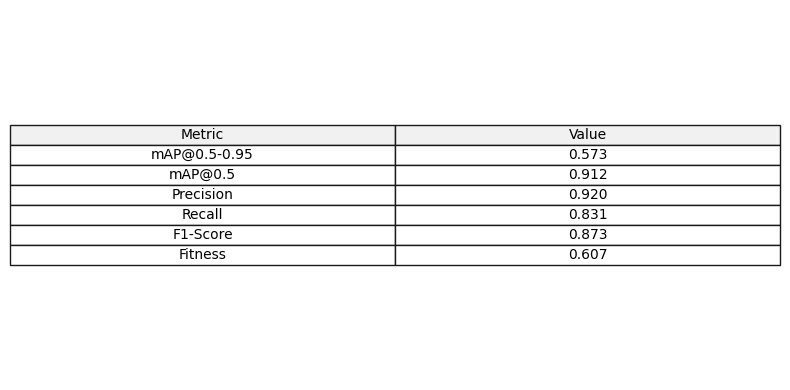

Metrics image saved at: /kaggle/working/detection_metrics_image.png


In [34]:
import matplotlib.pyplot as plt
# Run validation
results = model.val(data='/kaggle/working/weed_dataset.yaml')
mean_metrics = results.results_dict  # Get the summary metrics for mAP, F1, etc.

# Calculate the F1 score
precision = mean_metrics['metrics/precision(B)']
recall = mean_metrics['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics in large format
print("\n" + "="*50)
print("DETECTION METRICS".center(50))
print("="*50)

# Print each metric using the correct keys
print(f"mAP@0.5-0.95: {mean_metrics['metrics/mAP50-95(B)']:.3f}")
print(f"mAP@0.5: {mean_metrics['metrics/mAP50(B)']:.3f}")
print(f"Precision: {mean_metrics['metrics/precision(B)']:.3f}")
print(f"Recall: {mean_metrics['metrics/recall(B)']:.3f}")
print(f"F1-Score: {f1_score:.3f}")
print(f"Fitness: {mean_metrics['fitness']:.3f}")
print("="*50)

# Prepare the data for displaying in a table
metrics_data = {
    "Metric": ["mAP@0.5-0.95", "mAP@0.5", "Precision", "Recall", "F1-Score", "Fitness"],
    "Value": [
        f"{mean_metrics['metrics/mAP50-95(B)']:.3f}",
        f"{mean_metrics['metrics/mAP50(B)']:.3f}",
        f"{precision:.3f}",
        f"{recall:.3f}",
        f"{f1_score:.3f}",
        f"{mean_metrics['fitness']:.3f}"
    ]
}

import pandas as pd
df = pd.DataFrame(metrics_data)

# Plot the table
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["#f1f1f1"]*df.shape[1])

# Display the table as an image
plt.tight_layout()
plt.savefig("/kaggle/working/detection_metrics_image.png") 
plt.show()

print("Metrics image saved at: /kaggle/working/detection_metrics_image.png")



In [26]:
import shutil
model_directory = '/kaggle/working/yolo_training'
output_zip = '/kaggle/working/yolo_training.zip'
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', model_directory)


'/kaggle/working/yolo_training.zip'

In [27]:
from IPython.display import FileLink
FileLink('yolo_training.zip')

/kaggle/working/yolo_training.zip

In [31]:

TEST_IMAGES_DIR = "/kaggle/input/weed-detection-renamed/test/images"
PREDICTIONS_DIR = "/kaggle/working/test_predictions"  # Directory where you want to save predictions

# Create directory to save predictions
os.makedirs(PREDICTIONS_DIR, exist_ok=True)

# Run inference on test images
results = model.predict(source=TEST_IMAGES_DIR, conf=0.5, save=False)

def convert_predictions_to_yolo(results, save_dir, image_width, image_height):
    """
    Converts YOLO predictions into YOLO annotation format and saves them as .txt files.
    
    Args:
        results: YOLO inference results containing boxes, scores, and labels.
        save_dir: Directory to save the predictions.
        image_width: Width of the image (used for normalization).
        image_height: Height of the image (used for normalization).
    """
    for r in results:
        image_name = os.path.basename(r.path).replace(".jpg", ".txt")
        label_path = os.path.join(save_dir, image_name)

        with open(label_path, "w") as f:
            for box, score, cls in zip(r.boxes.xywh.cpu().numpy(), r.boxes.conf.cpu().numpy(), r.boxes.cls.cpu().numpy()):
                if score > 0.5:  # Only save predictions with a confidence score > 0.5
                    x_center, y_center, width, height = box
                    class_id = int(cls)

                    # Normalize the coordinates to be between 0 and 1
                    x_center_normalized = x_center / image_width
                    y_center_normalized = y_center / image_height
                    width_normalized = width / image_width
                    height_normalized = height / image_height
                    f.write(f"{class_id} {x_center_normalized:.6f} {y_center_normalized:.6f} {width_normalized:.6f} {height_normalized:.6f}\n")

# Assuming you know the dimensions of the image
# You can extract the image size dynamically if needed, but let's assume a default image size here:
image_width = 512  # Example image width (in pixels)
image_height = 512  # Example image height (in pixels)

# Convert and save the predictions for test images (normalize bounding box coordinates)
convert_predictions_to_yolo(results, PREDICTIONS_DIR, image_width, image_height)
print(f"Predictions saved in {PREDICTIONS_DIR}")


Predictions saved in /kaggle/working/test_predictions


In [32]:
import shutil

model_directory = '/kaggle/working/test_predictions'

# Path to the output zip file
output_zip = '/kaggle/working/test_predictions.zip'

shutil.make_archive(output_zip.replace('.zip', ''), 'zip', model_directory)

print(f" zipped successfully: {output_zip}")

 zipped successfully: /kaggle/working/test_predictions.zip


In [33]:
from IPython.display import FileLink
FileLink('test_predictions.zip')

/kaggle/working/test_predictions.zip